{'person': 4, 'bus': 1, 'tie': 1, 'bicycle': 1}


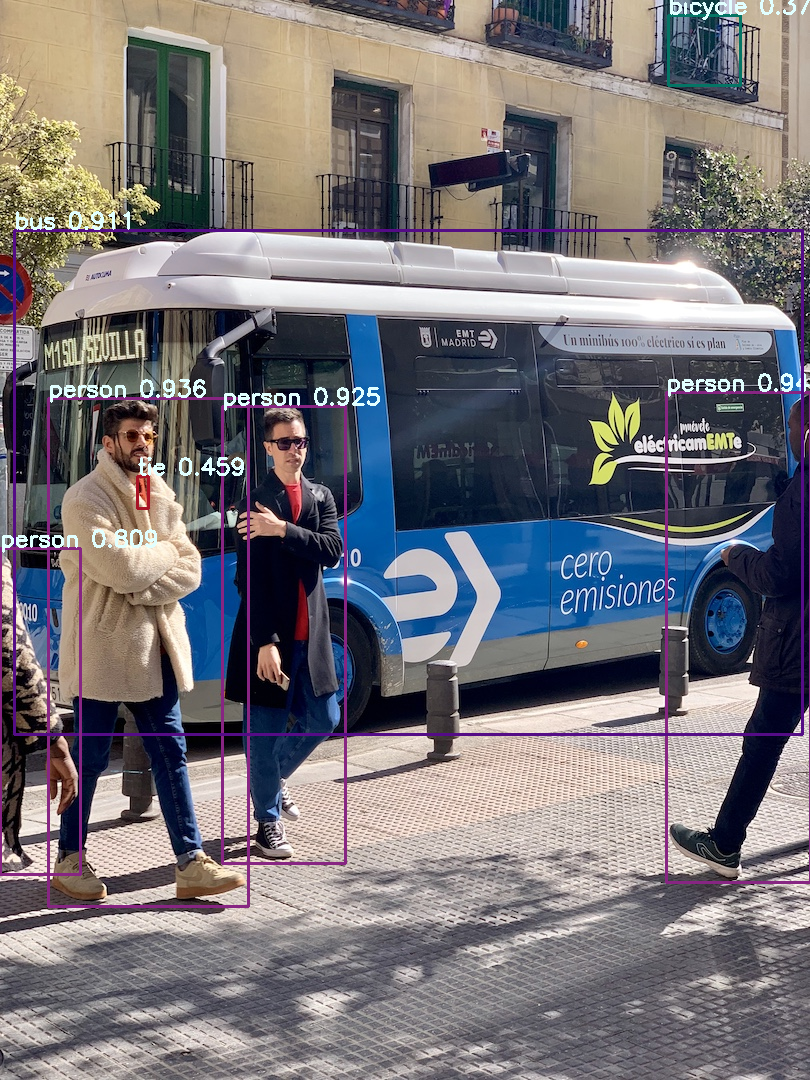

In [1]:
# Inference for ONNX model
from yolocounter.yolocounterv1 import YoloOnnx
from PIL import Image

class_names = ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
         'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
         'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
         'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard',
         'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
         'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
         'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
         'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear',
         'hair drier', 'toothbrush']
yolo = YoloOnnx(weigths_path = "yolov7_training.onnx", class_names = class_names, cuda = False)
img, outputs, c_scinames = yolo.inference('bus.jpg')  #outputs = (batch_id,x0,y0,x1,y1,cls_id,score)
img_output = yolo.visualize_detections(img, outputs)

print(c_scinames)
Image.fromarray(img_output)

In [2]:
%timeit img, outputs, countings = yolo.inference('bus.jpg')

227 ms ± 8.43 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [3]:
from glob import glob
img_paths = glob('images/*.jpg')
predictions = []
for img_path in img_paths:
    img, outputs, c_scinames = yolo.inference(img_path)
    img_output = yolo.visualize_detections(img, outputs)
    predictions.append((img_output, c_scinames))

{'person': 2, 'tie': 1, 'cake': 1}


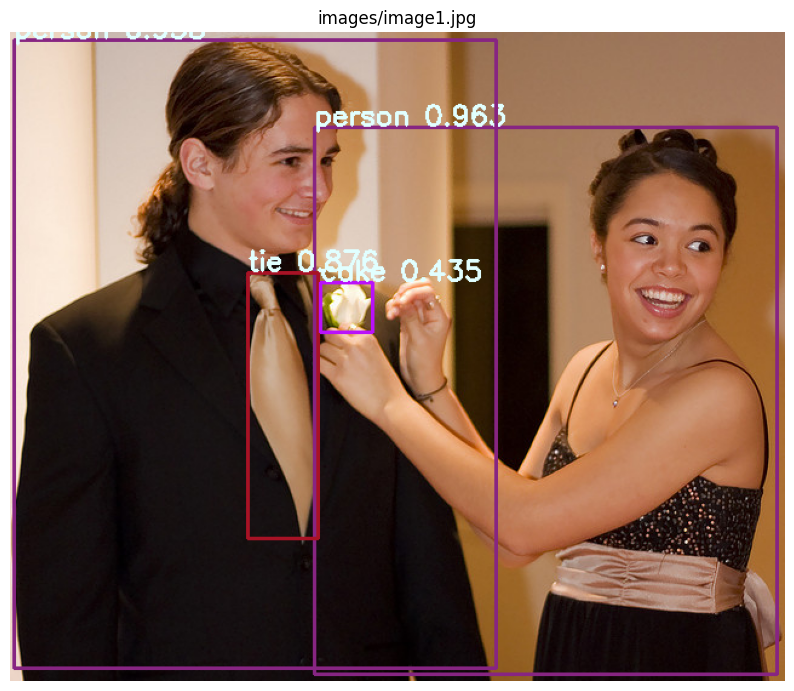

{'person': 4, 'bus': 1, 'tie': 1, 'bicycle': 1}


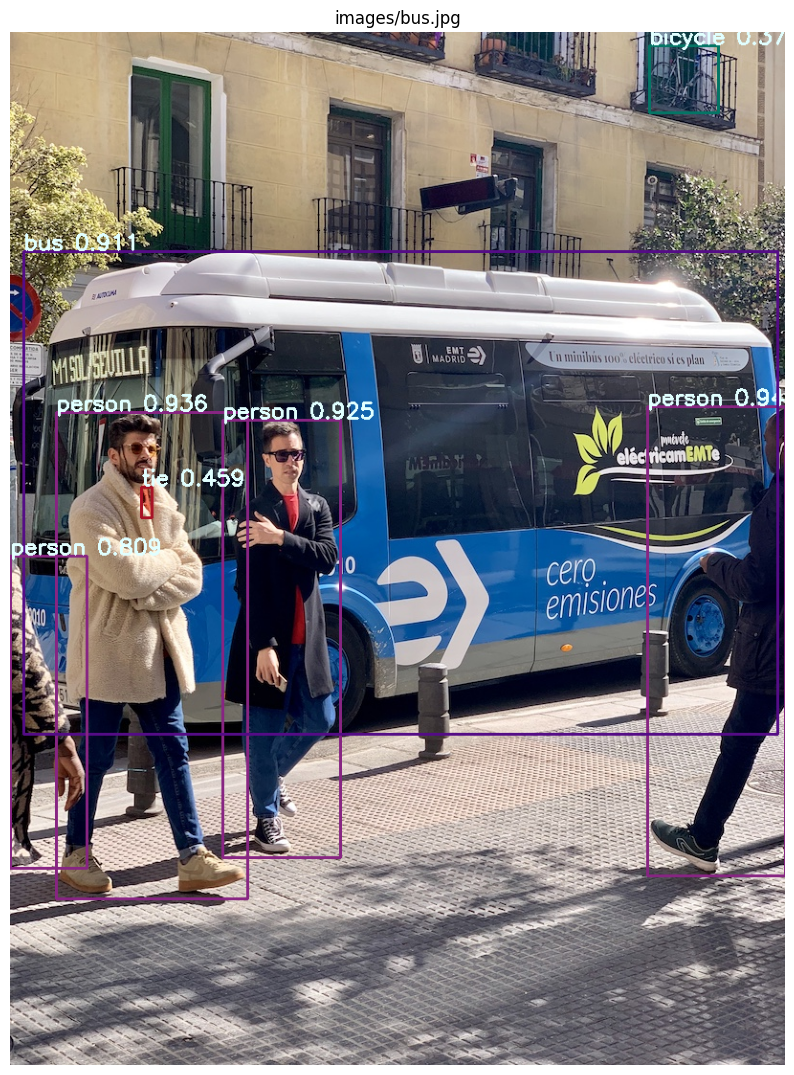

{'person': 2, 'sports ball': 1}


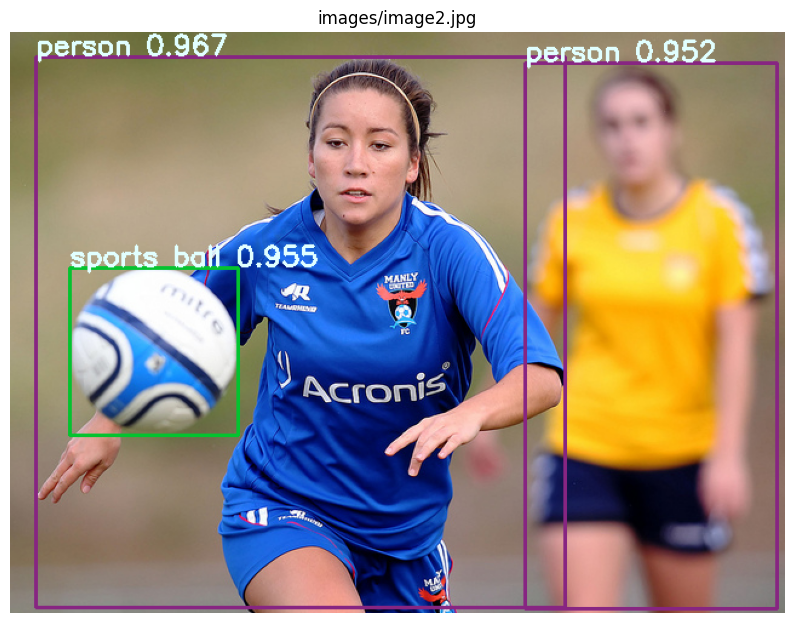

{'horse': 5}


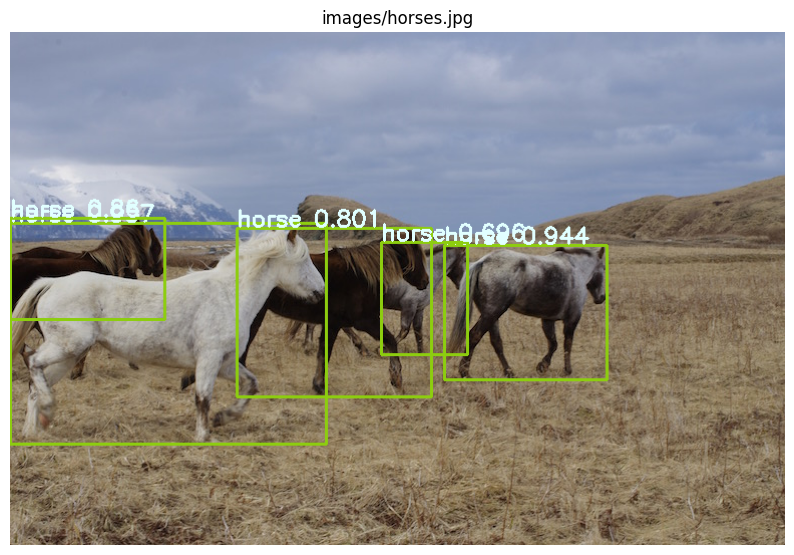

{'horse': 1, 'dog': 1}


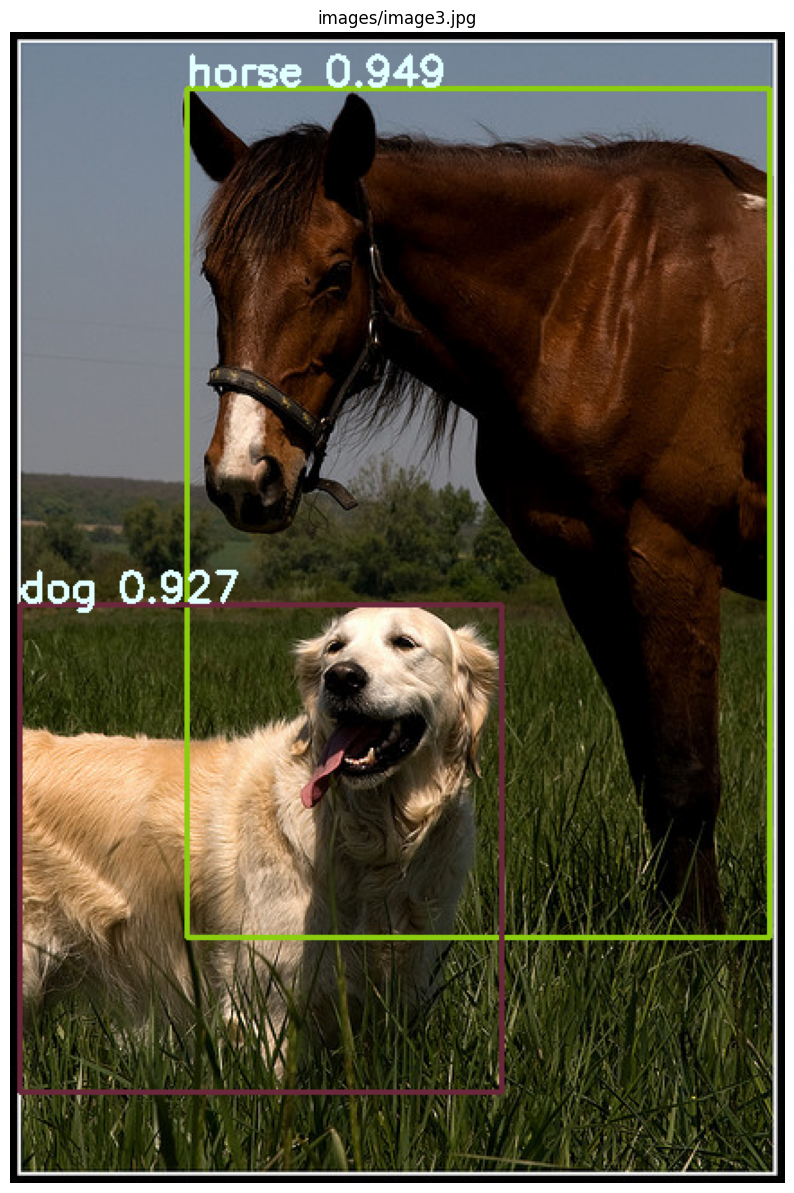

{'person': 3, 'tie': 1}


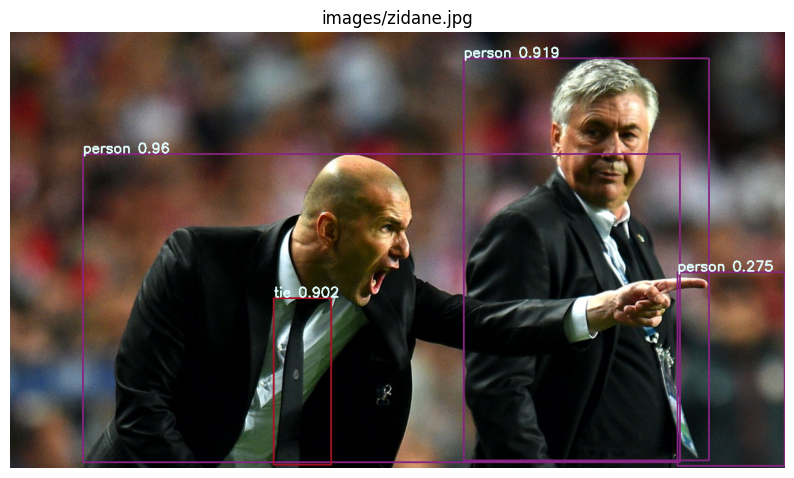

In [4]:
import matplotlib.pyplot as plt 
for (img, c_scinames), path in zip(predictions,img_paths):
    print(c_scinames)
    plt.figure(figsize=(10,20))
    plt.title(path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()